# Airbnb Open Data (Data Visualization)

##### This project focuses on exploring and visualizing the Airbnb Open Data (over 100,000 rows) using Python, specifically leveraging Seaborn and Matplotlib libraries. Through a series of visualizations, the project aims to uncover patterns, relationships, and trends within the dataset, highlighting key insights about listings, prices, room types, neighborhoods, and availability.

##### Tasks are:

1. Price Distribution **(Histogram/KDE)**
2. Room Type Distribution **(Pie Chart)**
3. Price vs. Reviews **(Scatter Plot)**
4. Average Price by Room Type **(Bar Chart)**
5. Top Neighborhoods **(Horizontal Bar Chart)**
6. Time Series Trends **(Line Plot)**
7. Correlation Heatmap **(Heatmap)**
8. Room Type by Neighborhood **(Stacked Bar Chart)**
9. Geographic Distribution **(Scatter Plot)**
10. Price Distribution by Neighborhood **(Box Plot)**

##### In section A., this involves purely cleaning data. You may skip this part and proceed to task 1.

##### A. Library Importing, Dataset Importing, and Data Cleaning section.

In [35]:
# Importing Libraries and Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
df = pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\Josh09\AppData\Local\Temp\ipykernel_18620\3671619752.py:7: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [36]:
# Check dataset and its summary

pd.set_option('display.max_columns', None)
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [37]:
# Data Type check

df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

Column 'price' and 'service fee' should be float, column 'last review' should be a datetime data type.

- Convert 'price' and 'service fee column to numeric type. These columns are in object type due to '$' sign.

- We will rename these columns to 'price (USD)' and 'service fee (USD)', remove $ in the data, and then convert them to numeric type


In [38]:
# Rename columns 'price' and 'service fee' to 'price (USD)' and 'service fee (USD)'.

df= df.rename(columns={'price': 'price (USD)', 'service fee': 'service fee (USD)'})

# Ensure all values are strings

df['price (USD)'] = df['price (USD)'].astype(str)
df['service fee (USD)'] = df['service fee (USD)'].astype(str)

# Remove '$' and ',' from 'price' and 'service fee' columns

df['price (USD)'] = df['price (USD)'].str.replace('[$,]', '', regex=True)
df['service fee (USD)'] = df['service fee (USD)'].str.replace('[$,]', '', regex=True)

df['price (USD)']

# Convert 'price (USD)' and 'service fee (USD)' columns to numeric values

df['price (USD)'] = pd.to_numeric(df['price (USD)'], errors='coerce')
df['service fee (USD)'] = pd.to_numeric(df['service fee (USD)'], errors='coerce')

In [39]:
# Convert 'last review' column to datetime format

df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [40]:
df.shape

(102599, 26)

In [41]:
# Check for missing values

df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price (USD)                          247
service fee (USD)                    273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

After checking columns by missing values, considerations are as followed:

- Rows with missing values for Name, Host Name, Country, Latitude, Longitude, and Price will be removed because these columns are **mandatory** for an Airbnb listing to be published online. This decision is informed by my expertise in the field and my experience as a long-time Airbnb host.

- Other missing values might be attributed to unimplemented features rather than data errors. We will leave these as they are and address them based on the specific task at hand.

- Column license are almost missing of all data.

In [42]:
# Remove missing data in columns NAME, host Name, country, lat, long, host_identity_verified and price USD.

df.dropna(subset=['NAME', 'host name', 'country', 'lat', 'long', 'host_identity_verified', 'price (USD)'], inplace=True)

In [43]:
# Column license are almost all missing values. Let's evaluate it further.

df['license'].unique()

array([nan, '41662/AL'], dtype=object)

After checking column 'license', we can see that there are no useable data in this column. Let's remove this column.

In [44]:
# Remove 'license' column from the dataset

df.drop('license', axis=1, inplace=True)

df.columns


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price (USD)', 'service fee (USD)',
       'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'house_rules'],
      dtype='object')

In [45]:
df.isna().sum()

id                                    0
NAME                                  0
host id                               0
host_identity_verified                0
host name                             0
neighbourhood group                  17
neighbourhood                        14
lat                                   0
long                                  0
country                               0
country code                         36
instant_bookable                     22
cancellation_policy                   0
room type                             0
Construction year                   179
price (USD)                           0
service fee (USD)                   238
minimum nights                      394
number of reviews                   182
last review                       15669
reviews per month                 15656
review rate number                  302
calculated host listings count      310
availability 365                    410
house_rules                       51281


In [46]:
# Check for duplicates

df.duplicated().sum()

539

In [47]:
# remove duplicates

df.drop_duplicates(inplace=True)

In [48]:
df.duplicated().sum()

0

### 1. Analyze the Distribution of Price (Histogram/KDE)

##### We will create a histogram to visualize the distribution of prices of Airbnb listings using Seaborn.

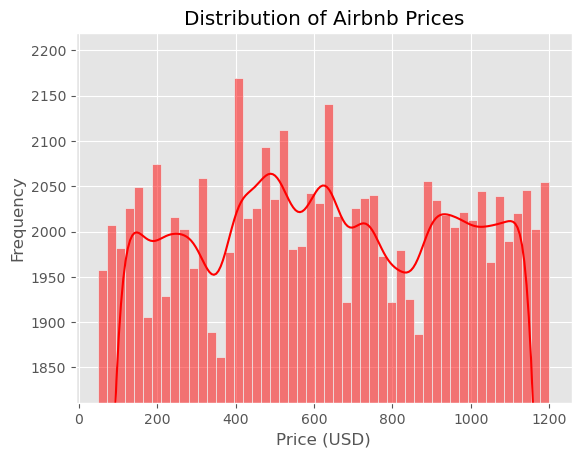

In [49]:
hist = sns.histplot(df['price (USD)'], bins=50, color='red', kde=True)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
counts = hist.patches 
bin_height = [patch.get_height() for patch in counts]
min_height = min(bin_height) - 50
max_height = max(bin_height) + 50
plt.ylim(min_height, max_height) # Set the lowest and highest bar (bins) to lowest and highest part of the histogram.
plt.show()



The histogram for Price (USD) appears to have a multimodal distribution. This indicates that Prices (USD) are clustered and have subgroups.

Task 1, done.

### 2. Room Type Distribution (Pie Chart)

##### We will use a pie chart to show the percentage distribution of room types in the dataset for visualization.

In [50]:
# Create dataframe for this task

pie = df['room type'].value_counts().reset_index()
pie.columns = ['room type', 'count']
pie

,room type,count
0,Entire home/apt,52572
1,Private room,45522
2,Shared room,2164
3,Hotel room,112


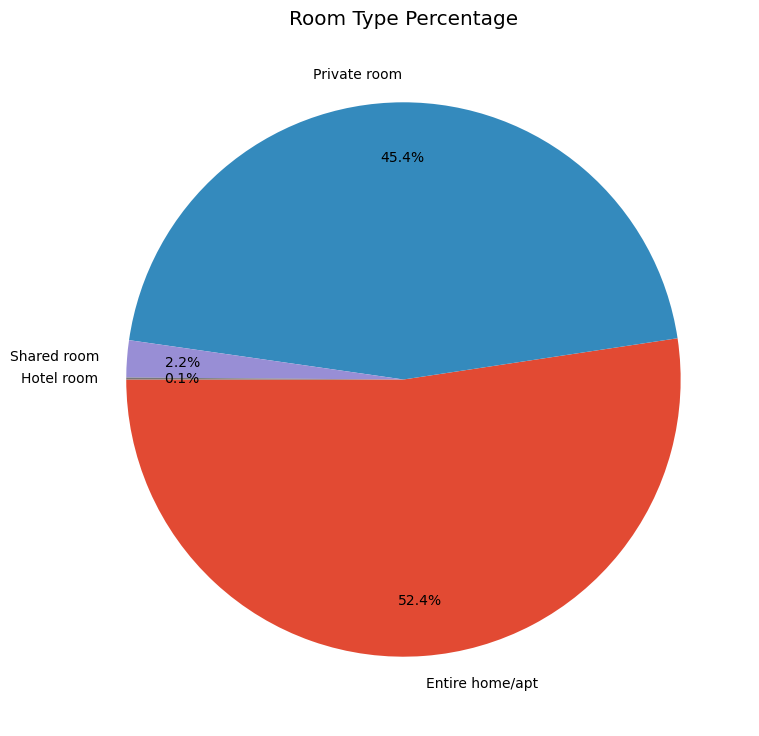

In [51]:
#Create piechart

plt.figure(figsize=(15,9))
plt.pie(pie['count'], labels=pie['room type'], autopct='%1.1f%%', startangle=180, pctdistance=.8)
plt.title('Room Type Percentage')

plt.show()

Task 2, done.

### 3. Price vs. Reviews **(Scatter Plot)**

##### Exploring the relationship between column Price and Number of Reviews.

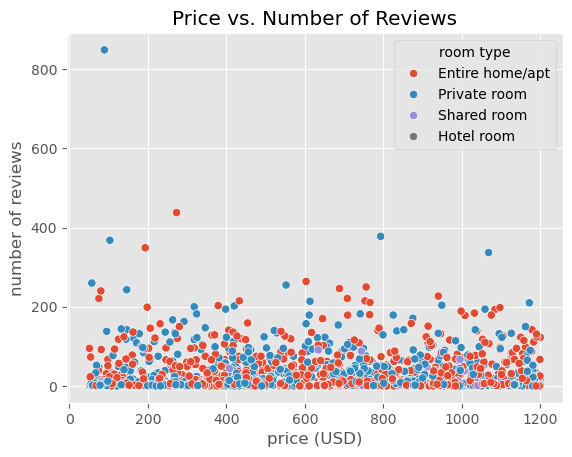

In [69]:
# Due to high number of rows (100,370), I opted to acquire random sample of 1000 in order to avoid over-saturation of plots.

df_sample = df.sample(n=2000) 

# Create a scatter plot. Add column 'room type' for hue.

sns.scatterplot(df_sample, y='number of reviews', x='price (USD)', hue='room type')
plt.title('Price vs. Number of Reviews')
plt.show()

The scatter plot indicates that the relationship of column 'price' and 'number if reviews' are independent from each other. It shows that changes in 'price' does not significantly impact the column 'number of reviews'.

Task 3, done.

### 4. Average Price by Room Type **(Bar Chart)**

##### Let's create a Bar Chart where it displays the price average by room type.

In [53]:
# Create dataframe where we group all the prices of each room type.

task4 = df.groupby('room type')['price (USD)']\
        .agg(Average_Price_USD =('mean'))

task4

,Average_Price_USD
room type,
Entire home/apt,625.458856
Hotel room,661.232143
Private room,624.843966
Shared room,635.486137


C:\Users\Josh09\AppData\Local\Temp\ipykernel_18620\712989193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(task4, x='room type', y='Average_Price_USD', palette='Set2')


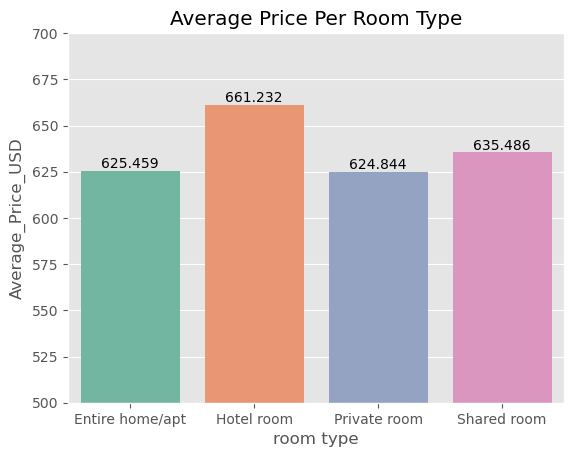

In [54]:
#Make a bar chart.

ax = sns.barplot(task4, x='room type', y='Average_Price_USD', palette='Set2')

# Bar values

for container in ax.containers:
    if len(container) > 0:  # Ensure non-empty containers
        ax.bar_label(container)

plt.title('Average Price Per Room Type')
plt.ylim(500,700)
plt.show()

Hotel room seems to have the highest average price out of the four room types, but also have the lowest booked record. We can hypothesize that guests perception revolves around the interplay of price and space. Further study is needed. 

Task 4, done.

### 5. Top Neighborhoods **(Horizontal Bar Chart)**

##### Let's create a horizontal bar chart to show the top 10 neighbourhoods with the most Airbnb listings.

C:\Users\Josh09\AppData\Local\Temp\ipykernel_18620\2638418034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(df['neighbourhood'].value_counts().sort_values(ascending=False).head(10), orient='h', palette='Set1')


Text(0, 0.5, 'Neighbourhood')

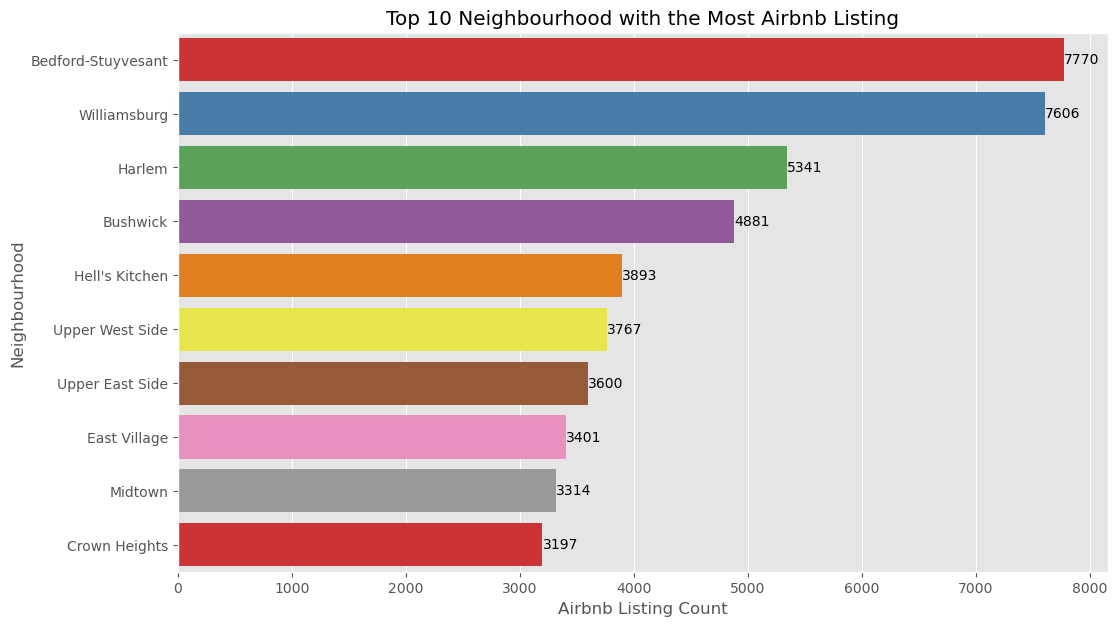

In [55]:
plt.figure(figsize=(12,7))
ax = sns.barplot(df['neighbourhood'].value_counts().sort_values(ascending=False).head(10), orient='h', palette='Set1')

for container in ax.containers:
    if len(container) > 0: 
        ax.bar_label(container)

plt.title('Top 10 Neighbourhood with the Most Airbnb Listing')
plt.xlabel('Airbnb Listing Count')
plt.ylabel('Neighbourhood')

Task 5, done.

### 6. Time Series Trends **(Line Plot)**

##### Create a line plot showing the trend of listing availability over time using Seaborn's `lineplot`.

##### *Disclaimer: Column 'last review' is the only available datetime data in this dataset, instead of a more stable data such as check-in date, check-out date, or booking date. In reality, this can be a weak variable for the reason that not all that has booked leaves a review. This task is only for the purpose of highlighting visualization capability on Python.*

In [56]:
# check columns last review and availability 365

df[['last review','availability 365']]

,last review,availability 365
0,2021-10-19,286.0
1,2022-05-21,228.0
4,2018-11-19,289.0
5,2019-06-22,374.0
7,2017-10-05,219.0
...,...,...
102053,2019-03-27,0.0
102054,2017-08-31,0.0
102055,2019-06-26,235.0
102056,NaT,0.0


In [57]:
df[['last review','availability 365']].describe()

,last review,availability 365
count,84761,99960.000000
mean,2019-06-09 01:25:44.592442368,141.151601
min,2012-07-11 00:00:00,-10.000000
25%,2018-10-26 00:00:00,3.000000
50%,2019-06-13 00:00:00,96.000000
75%,2019-07-05 00:00:00,269.000000
max,2040-06-16 00:00:00,3677.000000
std,NaN,135.435093


Several issues has been identified. The maximum value of 'last review' has a year 2040; minimum and maximum values of 'availability 365' are beyond day 1 and 365 of a year. This is illogical in the context of this task and should be corrected.

In [58]:
# Remove all missing data, and data in column 'availability 365'.

task6 = df[['last review','availability 365']].dropna()
task6

,last review,availability 365
0,2021-10-19,286.0
1,2022-05-21,228.0
4,2018-11-19,289.0
5,2019-06-22,374.0
7,2017-10-05,219.0
...,...,...
102052,2019-07-01,323.0
102053,2019-03-27,0.0
102054,2017-08-31,0.0
102055,2019-06-26,235.0


In [59]:
# Keep only between 1 to 365 values of 'availability 365' column. 

task6 = task6[(task6['availability 365'] >= 1) & (task6['availability 365'] <= 365) & (task6['last review'] != '2040-06-16')]
task6

,last review,availability 365
0,2021-10-19,286.0
1,2022-05-21,228.0
4,2018-11-19,289.0
7,2017-10-05,219.0
8,2019-06-24,180.0
...,...,...
102039,2019-05-23,147.0
102040,2019-06-29,361.0
102052,2019-07-01,323.0
102055,2019-06-26,235.0


In [60]:
# Group by 'last review' and 'availability 365'.

task6 = task6.groupby('last review')['availability 365'].sum().reset_index()

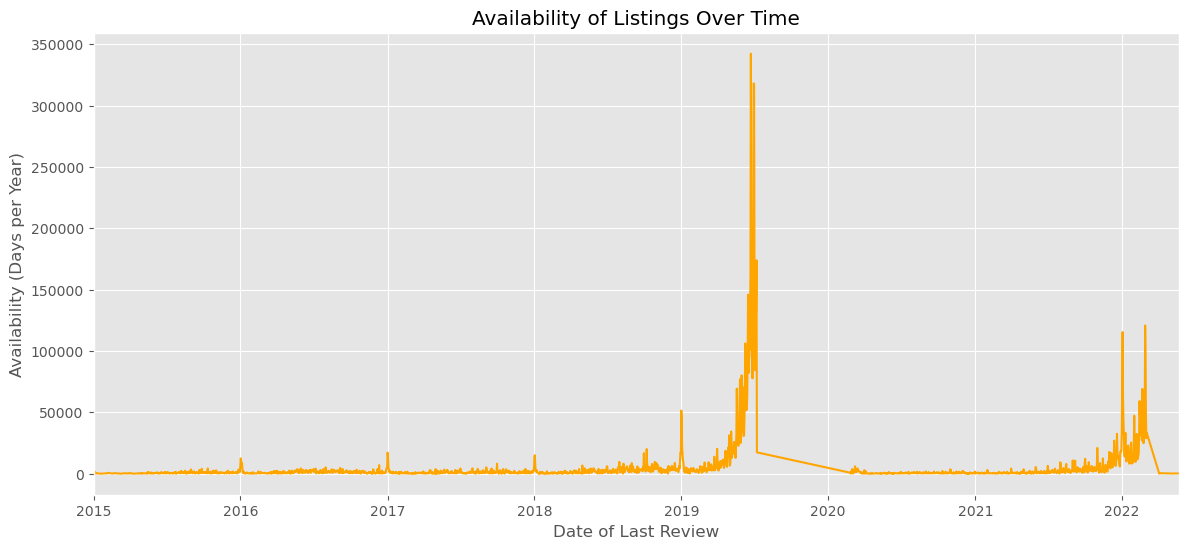

In [61]:
# Line plot for availability over time

plt.figure(figsize=(14,6))
sns.lineplot(task6, x='last review', y='availability 365', color='orange')
plt.title('Availability of Listings Over Time')
plt.xlabel('Date of Last Review')
plt.ylabel('Availability (Days per Year)')
plt.xlim(pd.Timestamp('2015-01-01'),task6['last review'].max())
plt.show()

Airbnb bookings seasonality is apparent around year end, while significant noise can be seen in the middle of 2019 and 2022. One obvious hypothesis may be due to the world wide pandemic events, such as the start and end of travel restrictions. Deeper insights in regards to it is subject for further analysis.

Task 6, done.

### 7. Correlation Heatmap **(Heatmap)**

##### We will create a heatmap to visualize the correlation between numeric variables in the dataset using Seaborn's `heatmap`.

In [62]:
# Make a dataframe that are all numeric columns in this data set.

df_corr = df.select_dtypes(include='number')

# Remove columns host id and id. Though numerical, values in these fields are identifiers, not for measurement.

df_corr = df_corr.drop(columns=['id','host id'])

# Set up the new dataframe for heatmap.

df_corr = df_corr.dropna().corr()


df_corr

,lat,long,Construction year,price (USD),service fee (USD),minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
lat,1.000000,0.073869,0.007325,-0.005777,-0.005742,0.017600,-0.021724,-0.020218,-0.004315,0.026308,-0.013321
long,0.073869,1.000000,0.000317,0.002333,0.002321,-0.033351,0.065962,0.119517,0.015078,-0.092338,0.073670
Construction year,0.007325,0.000317,1.000000,-0.003777,-0.003767,0.002375,0.003627,0.005432,0.005610,-0.002808,-0.007513
price (USD),-0.005777,0.002333,-0.003777,1.000000,0.999991,-0.004300,0.004417,0.004266,-0.007416,-0.000328,-0.000709
service fee (USD),-0.005742,0.002321,-0.003767,0.999991,1.000000,-0.004274,0.004386,0.004239,-0.007430,-0.000324,-0.000694
minimum nights,0.017600,-0.033351,0.002375,-0.004300,-0.004274,1.000000,-0.047807,-0.094703,0.000467,0.067328,0.043162
number of reviews,-0.021724,0.065962,0.003627,0.004417,0.004386,-0.047807,1.000000,0.594850,-0.019378,-0.079422,0.108253
reviews per month,-0.020218,0.119517,0.005432,0.004266,0.004239,-0.094703,0.594850,1.000000,0.038269,-0.024297,0.079101
review rate number,-0.004315,0.015078,0.005610,-0.007416,-0.007430,0.000467,-0.019378,0.038269,1.000000,0.023726,-0.011840
calculated host listings count,0.026308,-0.092338,-0.002808,-0.000328,-0.000324,0.067328,-0.079422,-0.024297,0.023726,1.000000,0.135333


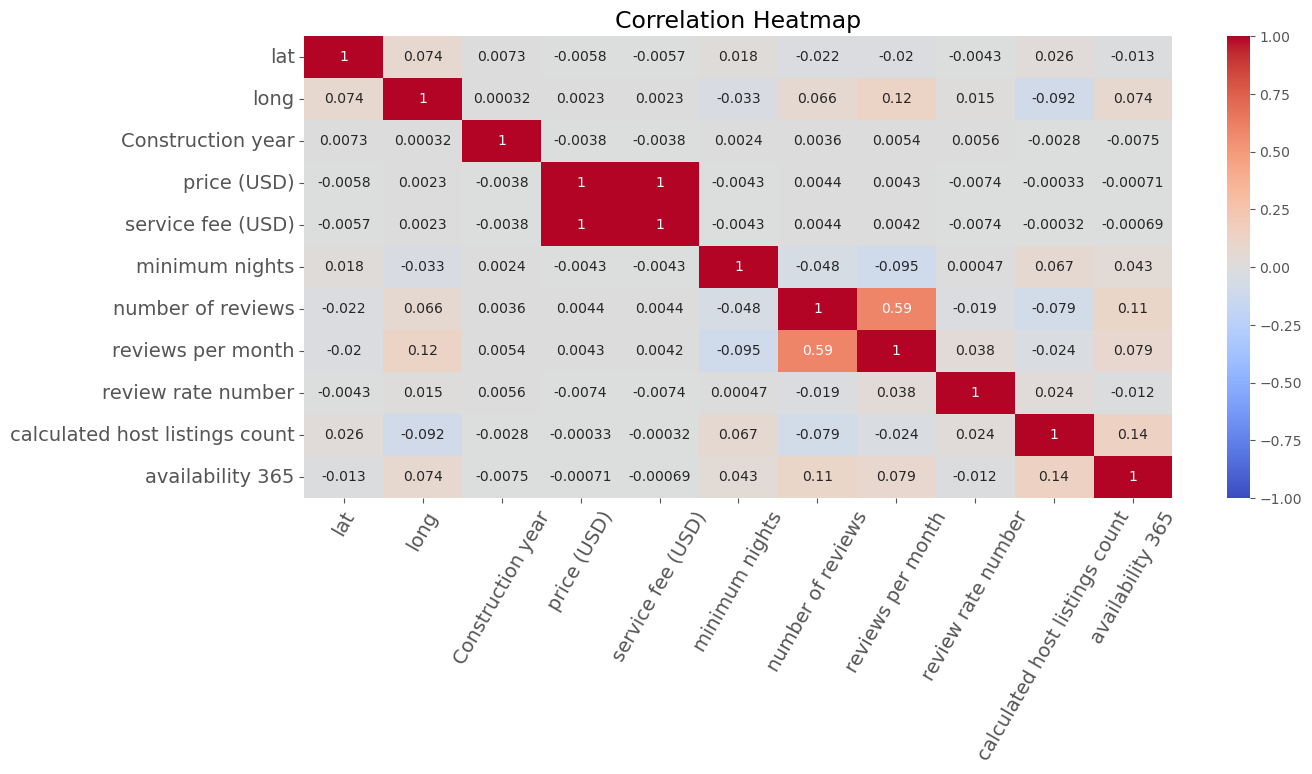

In [63]:
# Make a heatmap out from df_corr.

plt.figure(figsize=(14,6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1)
plt.title('Correlation Heatmap', fontsize=17)
plt.xticks(fontsize=14,rotation=60)
plt.yticks(fontsize=14)
plt.show()

Columns that has strong correlation are 'service fee (USD)' and 'price (USD)'; 'number of reviews' and 'reviews per month' has moderate correlation.

Task 7, done.

### 8. Room Type by Neighborhood **(Countplot)**

##### Let's create a stacked bar chart showing the number of listings per room type for the top 5 neighbourhoods using Seaborn's `countplot` and hue for stacking.


In [64]:
# Obtain top 5 Neighbourhood and create new dataframe.

top5 = df['neighbourhood'].value_counts().head(5).index
df_top5 = df[df['neighbourhood'].isin(top5)].reset_index()
df_top5

,index,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price (USD),service fee (USD),minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...
1,8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,True,strict,Private room,2005.0,1018.0,204.0,2.0,430.0,2019-06-24,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...
2,16,1010173,Only 2 stops to Manhattan studio,62566345680,unconfirmed,Heather,Brooklyn,Williamsburg,40.70837,-73.95352,United States,NaN,NaN,moderate,Entire home/apt,2009.0,778.0,NaN,2.0,148.0,2019-06-29,1.20,3.0,1.0,197.0,"Absolutely no smoking in the building, handlin..."
3,21,1012934,Sweet and Spacious Brooklyn Loft,86554611512,verified,Alissa,Brooklyn,Williamsburg,40.71842,-73.95718,United States,NaN,NaN,flexible,Entire home/apt,2016.0,477.0,95.0,3.0,9.0,2021-12-28,0.07,3.0,1.0,193.0,- No smoking or open flames on the property - ...
4,28,1016800,Midtown Pied-a-terre,19382804591,unconfirmed,Andrew,Manhattan,Hell's Kitchen,40.76715,-73.98533,United States,NaN,NaN,moderate,Entire home/apt,2016.0,209.0,42.0,10.0,58.0,2017-08-13,0.49,NaN,1.0,103.0,"Please no pets or smoking in the house, though..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29486,102038,57356923,HUGE BEDROOM LORIMER L TRAIN!!!,29320426760,unconfirmed,Jose,Brooklyn,Williamsburg,40.71355,-73.95003,United States,US,True,flexible,Private room,2016.0,570.0,NaN,28.0,17.0,2019-04-30,0.61,1.0,6.0,229.0,No smoking
29487,102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,flexible,Private room,NaN,909.0,NaN,1.0,19.0,2017-08-31,0.72,3.0,2.0,0.0,#NAME?
29488,102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,moderate,Entire home/apt,NaN,387.0,NaN,2.0,50.0,2019-06-26,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...
29489,102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,US,True,strict,Private room,NaN,848.0,NaN,2.0,0.0,NaT,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...


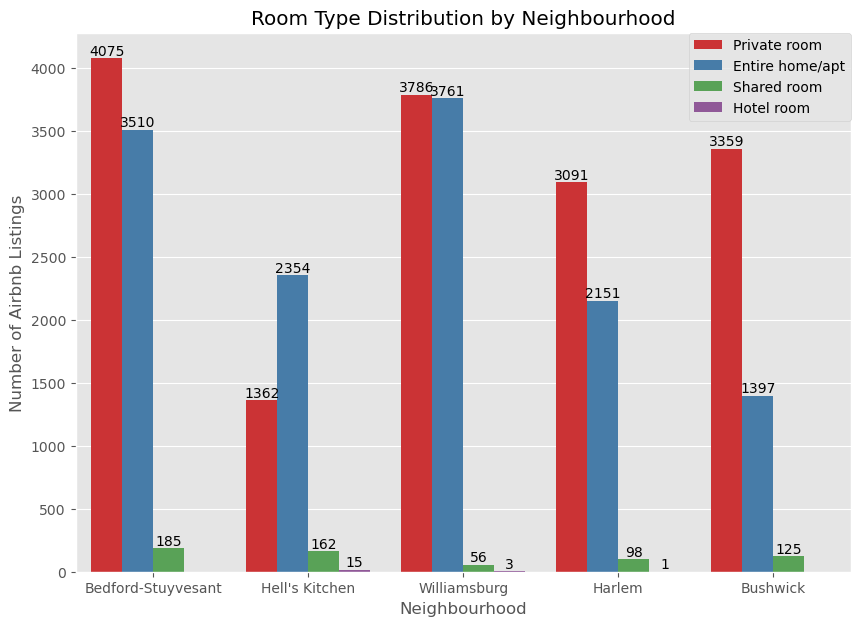

In [65]:
# Create countplot.

plt.figure(figsize=(10,7))
ax = sns.countplot(df_top5, x='neighbourhood', hue='room type', palette='Set1')
plt.ylabel('Number of Airbnb Listings')
plt.xlabel('Neighbourhood')
plt.title('Room Type Distribution by Neighbourhood')

# Apply bar labels to all bars.

for container in ax.containers:
    ax.bar_label(container)

# Adjust bar distance.

plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0)

plt.show()

Task 8, done.

### 9. Geographic Distribution **(Scatter Plot)**

##### Let's create a scatter plot using longitude and latitude to visualize the geographic distribution of Airbnb listings using Seaborn's `scatterplot`.

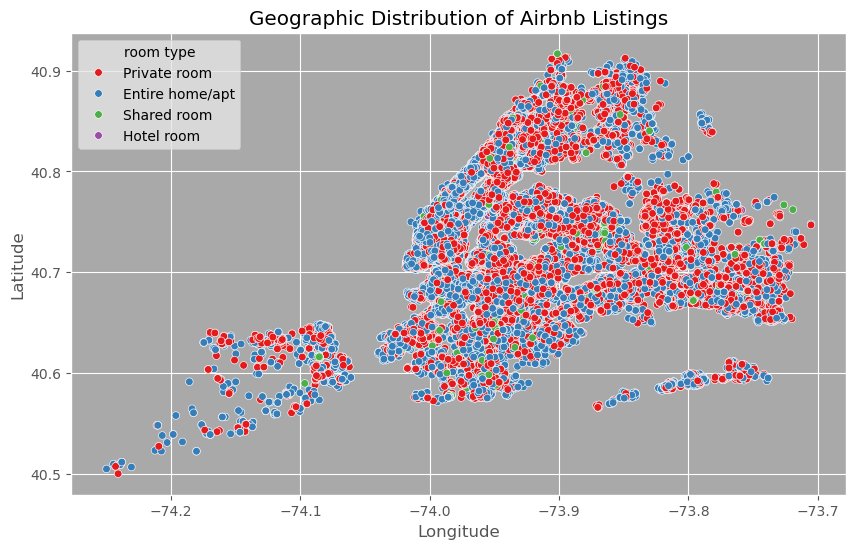

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(df, x='long', y='lat', hue='room type', palette='Set1', s=30)\
    .set_facecolor('darkgrey') # Set background color for a better contrast.
plt.title('Geographic Distribution of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Task 9, done.

### 10. Price Distribution by Neighborhood **(Box Plot)**

##### Create a box plot to compare the distribution of prices across the top 5 neighbourhoods using Seaborn's `boxplot`.

In [67]:
# Gather top 5 neighbourhood

task10 = df['neighbourhood'].value_counts().head(5).index

df_top5 = df[df['neighbourhood'].isin(task10)].reset_index()
df_top5

,index,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price (USD),service fee (USD),minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...
1,8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,True,strict,Private room,2005.0,1018.0,204.0,2.0,430.0,2019-06-24,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...
2,16,1010173,Only 2 stops to Manhattan studio,62566345680,unconfirmed,Heather,Brooklyn,Williamsburg,40.70837,-73.95352,United States,NaN,NaN,moderate,Entire home/apt,2009.0,778.0,NaN,2.0,148.0,2019-06-29,1.20,3.0,1.0,197.0,"Absolutely no smoking in the building, handlin..."
3,21,1012934,Sweet and Spacious Brooklyn Loft,86554611512,verified,Alissa,Brooklyn,Williamsburg,40.71842,-73.95718,United States,NaN,NaN,flexible,Entire home/apt,2016.0,477.0,95.0,3.0,9.0,2021-12-28,0.07,3.0,1.0,193.0,- No smoking or open flames on the property - ...
4,28,1016800,Midtown Pied-a-terre,19382804591,unconfirmed,Andrew,Manhattan,Hell's Kitchen,40.76715,-73.98533,United States,NaN,NaN,moderate,Entire home/apt,2016.0,209.0,42.0,10.0,58.0,2017-08-13,0.49,NaN,1.0,103.0,"Please no pets or smoking in the house, though..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29486,102038,57356923,HUGE BEDROOM LORIMER L TRAIN!!!,29320426760,unconfirmed,Jose,Brooklyn,Williamsburg,40.71355,-73.95003,United States,US,True,flexible,Private room,2016.0,570.0,NaN,28.0,17.0,2019-04-30,0.61,1.0,6.0,229.0,No smoking
29487,102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,US,False,flexible,Private room,NaN,909.0,NaN,1.0,19.0,2017-08-31,0.72,3.0,2.0,0.0,#NAME?
29488,102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,US,True,moderate,Entire home/apt,NaN,387.0,NaN,2.0,50.0,2019-06-26,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...
29489,102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,US,True,strict,Private room,NaN,848.0,NaN,2.0,0.0,NaT,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...


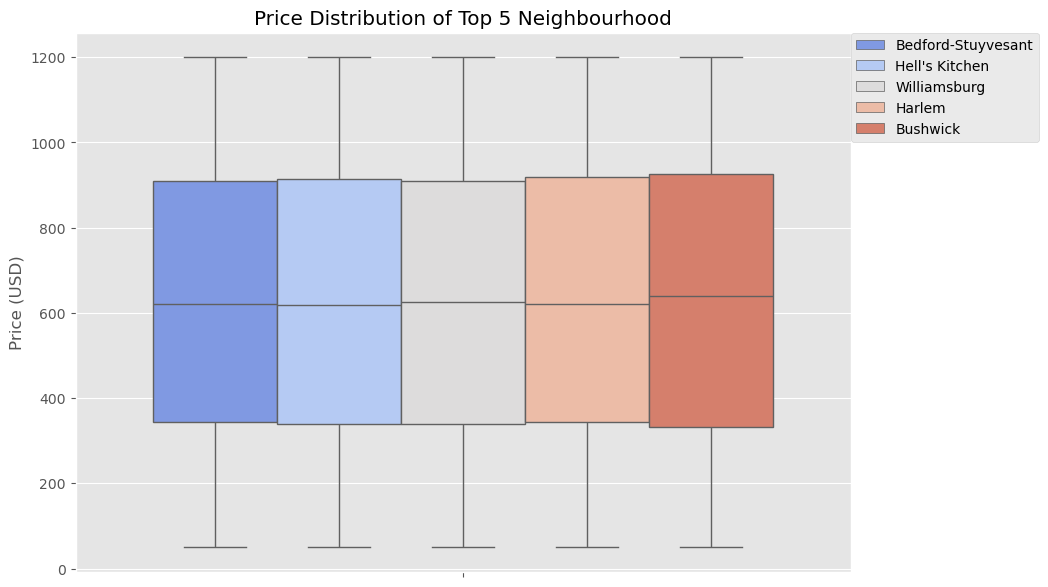

In [68]:
# Make a boxplot.

plt.figure(figsize=(10,7))
sns.boxplot(df_top5, hue='neighbourhood', y='price (USD)', palette=('coolwarm'))
plt.ylabel('Price (USD)')
plt.title('Price Distribution of Top 5 Neighbourhood')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.show()

As we can see, the minimum and maximum prices of all top 5 neighbourhood are all equal. I conclude that this data has already been filtered, for levels of variation of minimum and maximum price are absent. Data within first and third quantile, and their mean also has very small differences.

Task 10, done.